In [196]:
from sklearn import datasets
import random
import matplotlib.pyplot as plt
import numpy

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target


In [222]:
class KMeans:
    def __init__(self, n_clusters, max_iter=10):
        self.n_clusters = n_clusters
#         self.distance = distance
        self.max_iter = max_iter
        self.cluster_centers_ = []

    def fit(self,X):
        self.cluster_centers_ = random.sample(list(X),self.n_clusters)
        i = 0
        while i < self.max_iter:
            y = []
            
            for i in range(X.shape[0]):
                
                distances = [numpy.linalg.norm(X[i]-self.cluster_centers_[j]) for j in range(self.n_clusters)]
                y.append(distances.index(min(distances)))

            centroidbis = [ (numpy.mean(X[numpy.where(numpy.array(y) == cent)],axis=0)) for cent in range(self.n_clusters)]
            
            if (numpy.array(self.cluster_centers_) == numpy.array(centroidbis)).all():
                return 
            
            else: 
                self.cluster_centers_ = centroidbis.copy()
                i += 1
        
                
    def transform(self,X):
        pass
        
    def predict(self,X):
        array = [numpy.linalg.norm(X-centre, axis=1) for centre in self.cluster_centers_]
        y = []
        for j in range(len(array[0])):
            liste = [array[i][j] for i in range(len(array))]
            y.append(liste.index(min(liste)))
        return y
        

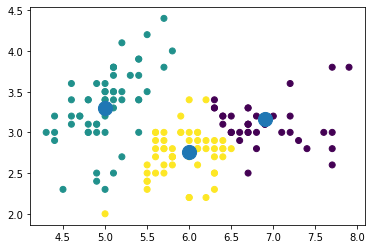

In [223]:
kmean = KMeans(3, 10)
kmean.fit(X)
plt.scatter(X[:,0],X[:,1], c=kmean.predict(X))
plt.scatter(numpy.array(kmean.cluster_centers_)[:,0],numpy.array(kmean.cluster_centers_)[:,1], s=200)


In [210]:
liste= numpy.array([2241,1,2,12,214,21,2])

In [224]:
class KMeans_all_numpy:
    def __init__(self, n_clusters, iterations=10):
        self.n_clusters = n_clusters
        self.iterations = iterations
        self.cluster_centers_ = numpy.array([])

    def fit(self,X):
        self.cluster_centers_ = random.sample(list(X),self.n_clusters)
        i = 0
        while i < self.iterations:
            y = []
            
            for i in range(X.shape[0]):
                
                distances = [numpy.linalg.norm(X[i]-self.cluster_centers_[j]) for j in range(self.n_clusters)]
                y.append(distances.index(min(distances)))

            centroidbis = [ (numpy.mean(X[numpy.where(numpy.array(y) == cent)],axis=0)) for cent in range(self.n_clusters)]
            
            if (numpy.array(self.cluster_centers_) == numpy.array(centroidbis)).all():
                return 
            
            else: 
                self.cluster_centers_ = centroidbis.copy()
                i += 1
        
                
    def transform(self,X):
        pass
        
    def predict(self,X):
        array = [numpy.linalg.norm(X-centre, axis=1) for centre in self.cluster_centers_]
        y = []
        for j in range(len(array[0])):
            liste = [array[i][j] for i in range(len(array))]
            y.append(liste.index(min(liste)))
        return y
        

In [227]:
kms= KMeans_all_numpy(2)

In [228]:
kms.fit(X)

In [229]:
kms.predict(X)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1]